In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline  

/home/ormenesse/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import tensorflow as tf

In [9]:
print('Inicio do projeto')

Inicio do projeto


In [13]:
caminho_names = [item[20:-1] for item in sorted(glob("/home/ormenesse/Udacity Nanodegree/dermatologist-ai/train/train/*/"))]

In [51]:
print('As classes utilizadas são:')
classes_names = []
for i,name in enumerate(caminho_names):
    print(' ',i,'-\t',name.split('/')[-1])
    classes_names.append(name.split('/')[-1])

As classes utilizadas são:
  0 -	 melanoma
  1 -	 nevus
  2 -	 seborrheic_keratosis


In [52]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 3) #retorna qual a classe que está sendo treinada
    return files, targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('/home/ormenesse/Udacity Nanodegree/dermatologist-ai/train/train')
valid_files, valid_targets = load_dataset('/home/ormenesse/Udacity Nanodegree/dermatologist-ai/valid/valid')
#test_files, test_targets = load_dataset('/home/ormenesse/Udacity Nanodegree/dermatologist-ai/test/test)

melanoma


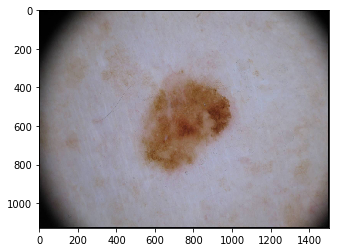

In [56]:
print('melanoma')
plt.imshow(cv2.cvtColor(cv2.imread(train_files[9]), cv2.COLOR_BGR2RGB))
plt.show()

nevus


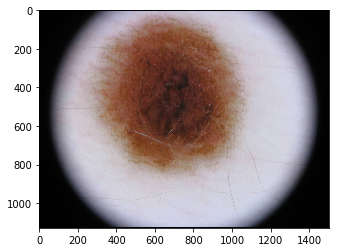

In [57]:
print('nevus')
plt.imshow(cv2.cvtColor(cv2.imread(train_files[0]), cv2.COLOR_BGR2RGB))
plt.show()

seborrheic_keratosis


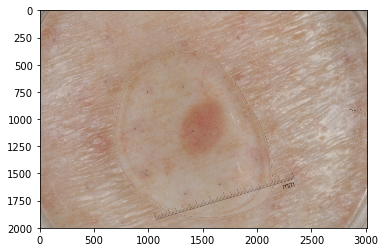

In [58]:
print('seborrheic_keratosis')
plt.imshow(cv2.cvtColor(cv2.imread(train_files[4]), cv2.COLOR_BGR2RGB))
plt.show()

# Trabalhando com TransferLearning

In [36]:
from keras.applications.resnet50 import ResNet50

In [37]:
resnet50_conv = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

/home/ormenesse/anaconda3/lib/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


### Analisando como Restnet está me devolvendo as features

In [101]:
resnet50_conv.predict(np.reshape(cv2.resize(cv2.imread(train_files[4]),(224,224)),(1,224,224,3))).shape

(1, 7, 7, 2048)

### Fim de análise

In [120]:
from keras.preprocessing.image import ImageDataGenerator
#tem que dividir por 255 para que haja o pré-processamento correto
datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20
 
train_features = np.zeros(shape=(train_files.shape[0], 7, 7, 2048))
train_labels = np.zeros(shape=(train_files.shape[0],3))
'''
train_generator = datagen. flow(
    train_files,
    train_targets,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)
'''
train_generator = datagen.flow_from_directory(
    '/home/ormenesse/Udacity Nanodegree/dermatologist-ai/train/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 2000 images belonging to 3 classes.


### Criando Features Sintéticas

In [149]:
sorted(glob("/home/ormenesse/Udacity Nanodegree/dermatologist-ai/train/train/*/"))

['/home/ormenesse/Udacity Nanodegree/dermatologist-ai/train/train/melanoma/',
 '/home/ormenesse/Udacity Nanodegree/dermatologist-ai/train/train/nevus/',
 '/home/ormenesse/Udacity Nanodegree/dermatologist-ai/train/train/seborrheic_keratosis/']

In [4]:
from sklearn.datasets import load_files 
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    return files
train_files = load_dataset('/home/ormenesse/Udacity Nanodegree/dermatologist-ai/train/train/')

In [33]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

for path_img in train_files:
    div_path = path_img.split('/')
    img = load_img(path_img)  # this is a PIL image
    img = img.resize((224,244)) #mudando para o tamanho de meu interesse
    x = img_to_array(img)  
    x = x.reshape((1,) + x.shape) #isso aqui tem que ser feito sei lá porque
    
    # the .flow() command below generates batches of randomly transformed images
    
    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./train/generated/'+div_path[-2], save_prefix=div_path[-1][:-4], save_format='jpeg'):
        i += 1
        if i > 5: # eu to colocando pouco para não ter problemas.
            break  # otherwise the generator would loop indefinitely

##### Trabalhando com as amostras geradas.

In [45]:
from keras.preprocessing.image import ImageDataGenerator
#tem que dividir por 255 para que haja o pré-processamento correto
datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20
 
train_features = np.zeros(shape=(train_files.shape[0], 7, 7, 2048))
train_labels = np.zeros(shape=(train_files.shape[0],3))

train_generator = datagen.flow_from_directory(
    './train/generated',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 11997 images belonging to 3 classes.


### Treinando minhas features

In [46]:
nImages = 11980
i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = resnet50_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nImages:
        break

ValueError: could not broadcast input array from shape (20,7,7,2048) into shape (0,7,7,2048)

In [47]:
train_labels.shape

(2000, 3)

### Validation Features

In [48]:
valid_generator = datagen.flow_from_directory(
    '/home/ormenesse/Udacity Nanodegree/dermatologist-ai/valid/valid',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 150 images belonging to 3 classes.


In [ ]:
#numero impar, tive que colocar 10 repetidas para não haver nenhum erro no desenvolvimento do modelo.
nImages = 160

valid_features = np.zeros(shape=(nImages, 7, 7, 2048))
valid_labels = np.zeros(shape=(nImages,3))

i=0
for inputs_batch, labels_batch in train_generator:
    features_batch = resnet50_conv.predict(inputs_batch)
    valid_features[i * batch_size : (i + 1) * batch_size] = features_batch
    valid_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nImages:
        break

### Meu modelo de classificação

In [144]:
from keras import models
from keras import layers
from keras import optimizers
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
 
model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,2048)))
model.add(layers.Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               51380736  
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
__________

In [146]:
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [147]:
from keras.callbacks import ModelCheckpoint  

epochs = 10

checkpointer = ModelCheckpoint(filepath='melhor_modelo_alcancado.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_features, train_labels, 
          validation_data=(valid_features, valid_labels),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 2000 samples, validate on 160 samples
Epoch 1/10
2000/2000 [==============================] - 95s 48ms/step - loss: 1.5112 - acc: 0.4440 - val_loss: 11.1566 - val_acc: 0.1563

Epoch 00001: val_loss improved from inf to 11.15659, saving model to melhor_modelo_alcancado.hdf5
Epoch 2/10
2000/2000 [==============================] - 91s 46ms/step - loss: 1.0475 - acc: 0.5785 - val_loss: 5.4659 - val_acc: 0.6562

Epoch 00002: val_loss improved from 11.15659 to 5.46594, saving model to melhor_modelo_alcancado.hdf5
Epoch 3/10
2000/2000 [==============================] - 80s 40ms/step - loss: 0.9417 - acc: 0.6240 - val_loss: 1.6020 - val_acc: 0.6562

Epoch 00003: val_loss improved from 5.46594 to 1.60203, saving model to melhor_modelo_alcancado.hdf5
Epoch 4/10
2000/2000 [==============================] - 82s 41ms/step - loss: 0.8577 - acc: 0.6415 - val_loss: 0.8595 - val_acc: 0.6500

Epoch 00004: val_loss improved from 1.60203 to 0.85949, saving model to melhor_modelo_alcancado.hdf5
Ep

# Overfittou

In [148]:
dir()

['BatchNormalization',
 'HTML',
 'ImageDataGenerator',
 'In',
 'ModelCheckpoint',
 'Out',
 'ResNet50',
 '_',
 '_100',
 '_101',
 '_107',
 '_11',
 '_114',
 '_115',
 '_116',
 '_124',
 '_126',
 '_127',
 '_128',
 '_133',
 '_136',
 '_147',
 '_20',
 '_22',
 '_23',
 '_24',
 '_25',
 '_26',
 '_28',
 '_29',
 '_31',
 '_36',
 '_37',
 '_38',
 '_39',
 '_40',
 '_41',
 '_42',
 '_43',
 '_44',
 '_45',
 '_46',
 '_48',
 '_49',
 '_50',
 '_6',
 '_68',
 '_69',
 '_7',
 '_76',
 '_77',
 '_8',
 '_86',
 '_93',
 '_95',
 '_96',
 '_99',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i100',
 '_i101',
 '_i102',
 '_i103',
 '_i104',
 '_i105',
 '_i106',
 '_i107',
 '_i108',
 '_i109',
 '_i11',
 '_i110',
 '_i111',
 '_i112',
 '_i113',
 '_i114',
 '_i115',
 '_i116',
 '_i117',
 '_i118',
 '_i119',
 '_i12',
 '_i120',
 '_i121',
 '_i122',
 '_i123',
 '_i124',
 '_i125',
 '_i126',
 '_i127',
 '_i128',
 '_i129',
 '_i13',
 '_i130',
 '_